# Основы машинного обучения: лабораторная работа №1
## Задание 2. Знакомство с Matplotlib и LaTeX

В этом задании по номеру варианта задана параметризованная математическая функция. Необходимо её оценить и визуализировать на графике с помощью Python.

### Цель

Научиться выполнять базовые математические операции с помощью `numpy` и визуализировать результаты с помощью `matplotlib`

### Оценивание и баллы

За это задание в общей сложности можно получить до 2 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить приведенные ниже задачи.

## Часть 1. Определить номер варианта

Начнем с импорта библиотеки `numpy`. Она понадобится позже для выполнения некоторых математических операций. Также потребуется библиотека `matplotlib.pyplot`, чтобы визуализировать результаты вычислений.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле `№ п/п`) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к преподавателю, принимающему лабораторные работы.

In [ ]:
### BEGIN YOUR CODE

Student_ID = 4

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [ ]:
task_id = None if Student_ID is None else Student_ID % 25 if Student_ID % 25 > 0 else 25
print(f"Пожалуйста, используйте математическую функцию No {task_id} ниже.")

Пожалуйста, используйте математическую функцию No 4 ниже.


![mathematical_functions.png](https://github.com/hse-mlwp-2022/assignment2-template/raw/main/mathematical_functions.png)

В списке математических функций, представленных выше, $y$, или, более корректно, $y(x)$, является зависимой переменной, полученной в результате вычисления математической функции. $a$, $b$, $c$, $d$ — это скалярные параметры функции, а $x$ — независимая переменная.

Теперь, когда функция выбрана, запишите её в ячейке ниже, используя LaTeX, и выполните ячейку, чтобы отобразить её.

$$ y = a \ln(b + cx) $$

## Часть 2. Вычисления в Python

Напишите функцию на Python, которая вычисляет математическую функцию $y(x)$ с заданными скалярными параметрами $a$, $b$, $c$, $d$ (если применимо) и списком значений независимой переменной $x$. Найти математические функции, доступные в библиотеке `numpy`, можно [здесь](https://numpy.org/doc/stable/reference/routines.math.html).

Пример для функции $y(x) = a \sin^2x + b\log_cx$ может выглядеть так:
```python
def my_function(x,a,b,c,d):
    return a * np.sin(x) ** 2 + b * np.log(x) / np.log(c)
```

In [ ]:
def my_function(x,a,b,c):
  ### BEGIN YOUR CODE
  return a* np.log(b + c*x)
  ### END YOUR CODE

Задайте значения для параметров $a$, $b$, $c$, $d$ и укажите диапазон для переменной $x$:

In [ ]:
### BEGIN YOUR CODE

a = 2
b = 2
c = 2
# d = 2
x = np.linspace(0, 10, 100)

### END YOUR CODE

Вычислите значения функции $y(x)$ на интервале `x`. Необходимо сделать это векторно и без использования циклов. Постройте график функции. Измените значения параметров $a$, $b$, $c$, $d$ и $x$ в ячейке выше, чтобы получить аккуратный, понятный и красивый график.

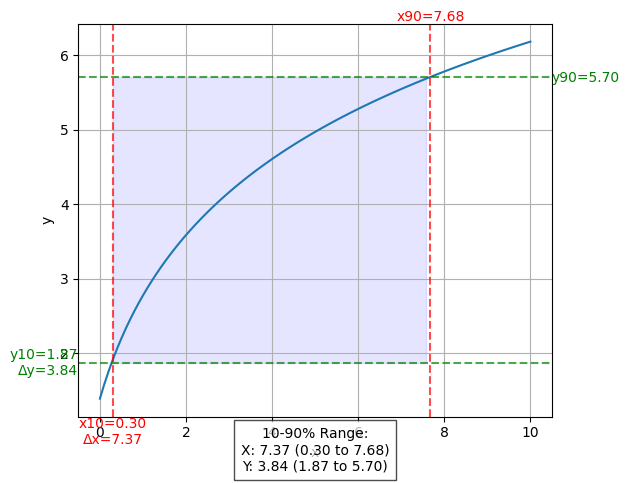

In [ ]:
### BEGIN YOUR CODE

y = my_function(x, a, b, c)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

# Полный диапазон y
y_min, y_max = np.min(y), np.max(y)
y_range = y_max - y_min

# 10% и 90% уровни
y10_val = y_min + 0.1 * y_range
y90_val = y_min + 0.9 * y_range

# Соответствующие значения x (первое пересечение)
x10 = x[np.where(y >= y10_val)[0][0]]
x90 = x[np.where(y >= y90_val)[0][0]]

# Диапазоны
x_range_10_90 = x90 - x10
y_range_10_90 = y90_val - y10_val

# Визуализация
plt.axvline(x=x10, color='r', linestyle='--', alpha=0.7)
plt.axvline(x=x90, color='r', linestyle='--', alpha=0.7)
plt.axhline(y=y10_val, color='g', linestyle='--', alpha=0.7)
plt.axhline(y=y90_val, color='g', linestyle='--', alpha=0.7)

# Подписи с диапазонами
plt.text(x10, plt.ylim()[0], f'x10={x10:.2f}\nΔx={x_range_10_90:.2f}',
         color='r', ha='center', va='top')
plt.text(x90, plt.ylim()[1], f'x90={x90:.2f}',
         color='r', ha='center', va='bottom')
plt.text(plt.xlim()[0], y10_val, f'y10={y10_val:.2f}\nΔy={y_range_10_90:.2f}',
         color='g', ha='right', va='center')
plt.text(plt.xlim()[1], y90_val, f'y90={y90_val:.2f}',
         color='g', ha='left', va='center')

# Область 10-90%
plt.fill_between(x, y10_val, y90_val, (y >= y10_val) & (y <= y90_val),
                color='blue', alpha=0.1)

# Инфо панель
info_text = (f"10-90% Range:\n"
             f"X: {x_range_10_90:.2f} ({x10:.2f} to {x90:.2f})\n"
             f"Y: {y_range_10_90:.2f} ({y10_val:.2f} to {y90_val:.2f})")
plt.figtext(0.5, 0.01, info_text, ha="center", fontsize=10,
           bbox={"facecolor":"white", "alpha":0.7, "pad":5})

plt.grid(True)
plt.tight_layout()
### END YOUR CODE

### Кастомизируйте свой график

Настройте внешний вид рисунка в ячейке выше. Измените цвет графика функции (например, задайте его красным), обновите стиль линии (например, нарисуйте пунктирную линию или штрих-пунктир), добавьте подписи, метки и так далее. Ознакомьтесь с [документацией](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) для получения дополнительных сведений. Попробуйте разместить несколько графиков с разными наборами значений параметров $a$, $b$, $c$, $d$ на одном рисунке, используя `subplot`. Посмотрите примеры из официального [руководства](https://matplotlib.org/stable/tutorials/index.html) для вдохновения.

## Часть 3. Линейная алгебра в Python

Вычислите скалярное произведение двух векторов `vector_a` и `vector_b`, заданных в ячейке с кодом ниже. Результат поместите в переменную `dot_product`.

In [ ]:
rng = np.random.RandomState(Student_ID)
vector_a = rng.choice(np.arange(100, dtype=np.int32), size=(1,5), replace=False)
vector_b = rng.choice(np.arange(100, dtype=np.int32), size=(5,1), replace=False)

### BEGIN YOUR CODE

dot_product = np.dot(vector_a, vector_b)

### END YOUR CODE

print(f'Вектор A: {vector_a}\nВектор B: {vector_b}\nCкалярное произведение <A, B>={dot_product}')

Вектор A: [[20 10 96 16 63]]
Вектор B: [[33]
 [88]
 [96]
 [21]
 [56]]
Cкалярное произведение <A, B>=[[14620]]


### Оценивание работы

За заполнение расположенных выше ячеек можно получить:
- максимум 0.5 балла за корректно заполненную ячейку с математической функцией, набранной с помощью LaTeX;
- максимум 0.5 балла за корректно работающий код во всех ячейках с кодом;
- максимум 1 балл за создание графика с внешним видом "не по умолчанию".